# Statistical Analysis II - Practicum 3 (Week 11)

## Factor analysis

In [33]:
from factor_analyzer import FactorAnalyzer

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.decomposition import FactorAnalysis, PCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

### Factor analysis

Resources from [url1](https://www.datasklr.com/principal-component-analysis-and-factor-analysis/factor-analysis), [url2](https://www.analyticsvidhya.com/blog/2020/10/dimensionality-reduction-using-factor-analysis-in-python/), [url3](https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html#sphx-glr-auto-examples-decomposition-plot-varimax-fa-py), and [url4](https://www.datacamp.com/tutorial/introduction-factor-analysis).

The documentation on the packages used is available from [link1](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.FactorAnalysis.html) and [link2](https://factor-analyzer.readthedocs.io/en/latest/).

**Factor analysis*** together with PCA (and other techniques) constitutes **multivariate analysis**.

- Factor analysis (FA) is also used for dimensionality reduction, but to describe variability among *observed* and (potentially) *correlated* variables. 

- The resulting variables describing these correlations, as linear combinations of the observed input variables, are called *latent variables* (latent, because they are not directly measured), or *factors*. 

- Factors is to represent the common variance, i.e. the part of the variance that occurs due to correlation among input factors.

- The contribution of the input variables to the factors is called *factor loading*.

- $x_i-\mu_i = \sum_k l_{i,k}*F_{i,k} + \epsilon_i$

- *Confirmatory FA* is used when one has already in mind which input variables combined may produce meaningful latent variables. This is conversely unknwown in *Exploratory FA*.

Let us look at a practical example of a recruiter that wants to hire employees for a business firm. 
The interview process has been over and for each personality of the interviewee, they have been rated out of 10.

In [5]:
# create the data frame
dataframe = pd.read_csv('./Datasets/dataset1.txt', sep=" ", header=0, index_col=0)
dataframe.head()

,distant,talkatv,carelss,hardwrk,anxious,agreebl,tense,kind,opposng,relaxed,...,lazy,coopera,quiet,organiz,criticl,lax,laidbck,withdrw,givinup,easygon
1,2,7,1,4,7,8,5,9,5,6,...,7,9,9,5,5,5,7,5,5,8
2,3,8,2,7,5,8,4,8,5,7,...,2,7,6,6,4,3,7,2,2,7
3,6,6,2,5,1,8,2,9,2,8,...,5,8,7,4,5,5,7,6,2,8
4,3,7,6,7,8,8,2,8,3,7,...,3,8,4,7,6,6,6,4,3,7
5,7,3,3,5,8,6,7,2,3,3,...,6,6,7,5,5,3,3,7,5,5


In [10]:
cols = dataframe.columns

We want to determine if latent variables can be determined to reduce the dimensionality of this problem consisting of 32 variables.

Firstly, how much are the input variables correlated?

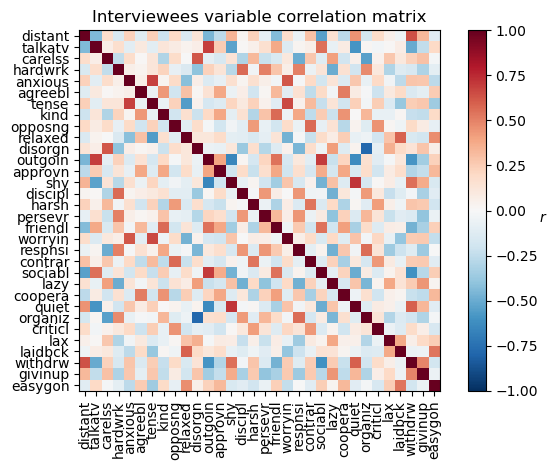

In [15]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(dataframe.T), cmap="RdBu_r", vmin=-1, vmax=1)

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)

ax.set_xticks([r for r in range(len(cols))])
ax.set_xticklabels(list(cols), rotation=90)
ax.set_yticks([r for r in range(len(cols))])
ax.set_yticklabels(list(cols))

ax.set_title("Interviewees variable correlation matrix")
plt.tight_layout()

How many factors can be used as latent variables?

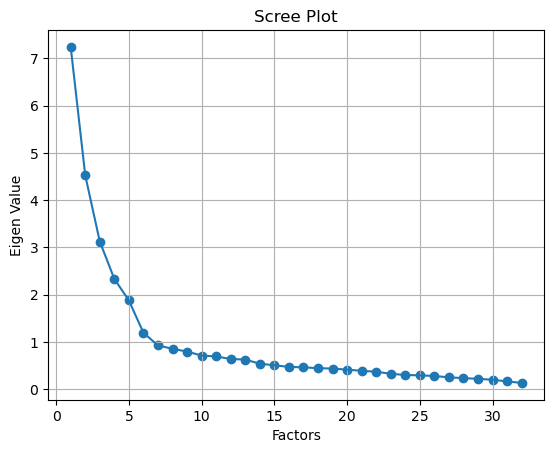

In [16]:
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=dataframe.shape[1])

fa.fit(dataframe)

ev,_ = fa.get_eigenvalues()

plt.scatter(range(1,dataframe.shape[1]+1),ev)
plt.plot(range(1,dataframe.shape[1]+1),ev)
plt.title('Screening Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value') #Eigen values are the number of features each factor accounts for.
plt.grid()

How do the factors relate to the input variables?

In [18]:
fa = FactorAnalyzer(n_factors=6,rotation='varimax') #varimax: few large and lots of close to 0 factor loadings

fa.fit(dataframe)

print(pd.DataFrame(fa.loadings_,index=dataframe.columns))

                0         1         2         3         4         5
distant  0.602104  0.014038  0.068210 -0.123350  0.267972  0.155527
talkatv -0.752967  0.057709 -0.031133  0.113607  0.148922  0.125759
carelss  0.049726 -0.281849  0.065247 -0.062136  0.210187  0.646609
hardwrk -0.174566  0.686705  0.135792  0.100152  0.049902 -0.159772
anxious  0.174010 -0.016189  0.690387  0.151628  0.207928  0.126165
agreebl -0.017614  0.038856 -0.064540  0.632146 -0.188072  0.099456
tense    0.164002  0.033223  0.770176  0.005764  0.257164  0.071961
kind    -0.112044  0.202357  0.037543  0.624149 -0.161057 -0.233964
opposng -0.013970 -0.081994  0.089573 -0.132212  0.648280  0.067609
relaxed -0.021896 -0.124597 -0.693567  0.336037 -0.065211  0.049736
disorgn  0.014261 -0.359592 -0.023890  0.004768  0.069330  0.773308
outgoin -0.822710  0.102481 -0.058807  0.216323  0.003913 -0.001228
approvn -0.264786  0.131711 -0.122753  0.501978 -0.123196 -0.030161
shy      0.705847 -0.235000  0.164623  0.005990 

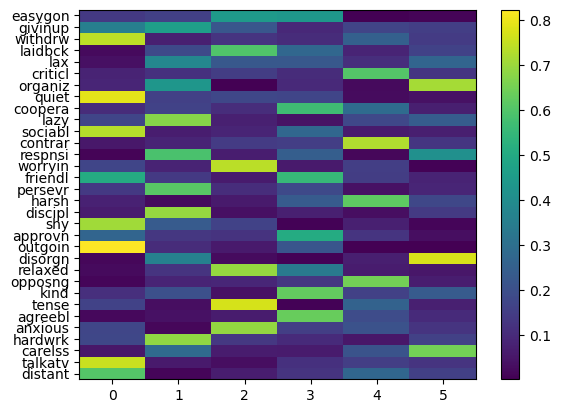

In [28]:
Z=np.abs(fa.loadings_)

fig, ax = plt.subplots()
c = ax.pcolor(Z)
fig.colorbar(c, ax=ax)
ax.set_yticks([r+0.5 for r in range(len(cols))])
ax.set_yticklabels(list(cols))
ax.set_xticks(np.arange(fa.loadings_.shape[1])+0.5, minor=False)
ax.set_xticklabels(np.arange(fa.loadings_.shape[1]), minor=False)
plt.show()

What is the amount of variance explained by the factors?

In [29]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2         3         4         5
Variance          4.500258  3.188169  2.973395  2.545142  2.310011  2.157789
Proportional Var  0.140633  0.099630  0.092919  0.079536  0.072188  0.067431
Cumulative Var    0.140633  0.240263  0.333182  0.412718  0.484905  0.552336


What are the communalities (i.e. the proportion of variance that can be explained for each input variable) of the factors?

In [32]:
print(pd.DataFrame(fa.get_communalities(),index=dataframe.columns,columns=['Communalities']))

         Communalities
distant       0.478591
talkatv       0.622158
carelss       0.552311
hardwrk       0.558524
anxious       0.589318
agreebl       0.450856
tense         0.692517
kind          0.525152
opposng       0.457260
relaxed       0.616685
disorgn       0.732914
outgoin       0.737626
approvn       0.370597
shy           0.585917
discipl       0.509680
harsh         0.479171
persevr       0.444214
friendl       0.606372
worryin       0.604663
respnsi       0.575010
contrar       0.594960
sociabl       0.630254
lazy          0.577194
coopera       0.457462
quiet         0.710736
organiz       0.713662
criticl       0.433357
lax           0.329547
laidbck       0.498039
withdrw       0.665039
givinup       0.440969
easygon       0.434011


What are the main differences between PCA and FA? Let's find out with another example, the _iris database_.

In [34]:
data = load_iris()
X = StandardScaler().fit_transform(data["data"])
variables_names = data["feature_names"]
print(data)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

How does the covariance matrix look like?

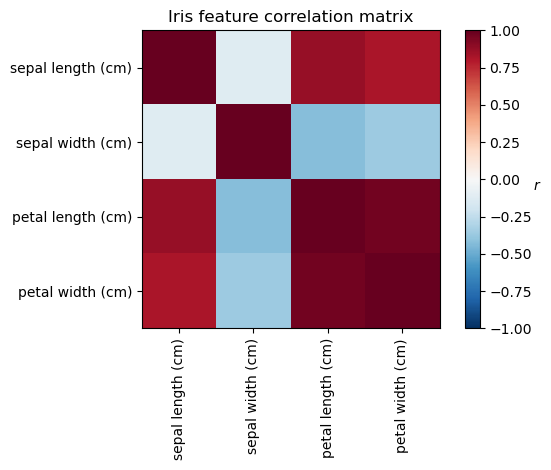

In [37]:
ax = plt.axes()

im = ax.imshow(np.corrcoef(X.T), cmap="RdBu_r", vmin=-1, vmax=1)

ax.set_xticks([0, 1, 2, 3])
ax.set_xticklabels(list(variables_names), rotation=90)
ax.set_yticks([0, 1, 2, 3])
ax.set_yticklabels(list(variables_names))

plt.colorbar(im).ax.set_ylabel("$r$", rotation=0)
ax.set_title("Iris feature correlation matrix")
plt.tight_layout()

Let's compare PCA vs. FA



 PCA :

[[ 0.52106591  0.37741762]
 [-0.26934744  0.92329566]
 [ 0.5804131   0.02449161]
 [ 0.56485654  0.06694199]]


 Unrotated FA :

[[ 0.88096009 -0.4472869 ]
 [-0.41691605 -0.55390036]
 [ 0.99918858  0.01915283]
 [ 0.96228895  0.05840206]]


 Varimax FA :

[[ 0.98633022 -0.05752333]
 [-0.16052385 -0.67443065]
 [ 0.90809432  0.41726413]
 [ 0.85857475  0.43847489]]


/opt/anaconda3/envs/base2/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
/opt/anaconda3/envs/base2/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
/opt/anaconda3/envs/base2/lib/python3.7/site-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.


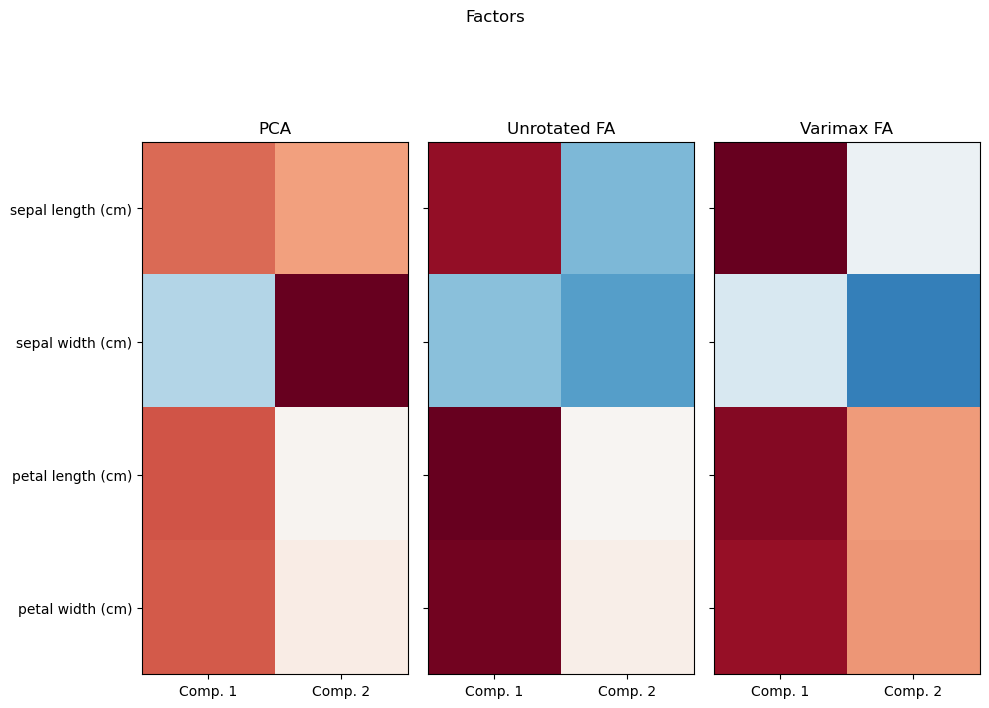

In [39]:
n_comps = 2

methods = [
    ("PCA", PCA()),
    ("Unrotated FA", FactorAnalysis()),
    ("Varimax FA", FactorAnalysis(rotation="varimax")),
]
fig, axes = plt.subplots(ncols=len(methods), figsize=(10, 8))

for ax, (method, fa) in zip(axes, methods):
    fa.set_params(n_components=n_comps)
    fa.fit(X)

    components = fa.components_.T
    print("\n\n %s :\n" % method)
    print(components)

    vmax = np.abs(components).max()
    ax.imshow(components, cmap="RdBu_r", vmax=vmax, vmin=-vmax)
    ax.set_yticks(np.arange(len(variables_names)))
    if ax.is_first_col():
        ax.set_yticklabels(variables_names)
    else:
        ax.set_yticklabels([])
    ax.set_title(str(method))
    ax.set_xticks([0, 1])
    ax.set_xticklabels(["Comp. 1", "Comp. 2"])
fig.suptitle("Factors")
plt.tight_layout()
plt.show()

- PCA components explain the maximum amount of variance while factor analysis explains the covariance in data.

- PCA components are fully orthogonal to each other whereas factor analysis does not require factors to be orthogonal.

- PCA component is a linear combination of the observed variable while in FA, the observed variables are linear combinations of the unobserved variable or factor.

- PCA components are uninterpretable. In FA, underlying factors are labelable and interpretable.

- PCA is a kind of dimensionality reduction method whereas factor analysis is the latent variable method.

- PCA is a type of factor analysis. PCA is observational whereas FA is a modeling technique.